# Normal Distribution



[Wiki](https://en.wikipedia.org/wiki/Normal_distribution) outlines the following properties.

The probability dense function(PDF) is


$\begin{align*}\quad\quad
f(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}\big(\frac{x-\mu}{\sigma}\big)^2}
\end{align*}$

where $\mu$ is the mean and $\sigma$ is the standard deviation.

The **standard** normal distribution has $\mu = 0$ and $\sigma = 1 $.

The cumulative distribution function is

$\begin{align*}\quad\quad
\frac{1}{2}\Big[1 + erf\big(\frac{x - \mu}{\sqrt{2}\sigma}\big)\Big]
\end{align*}$

where the error function $erf(x)$ is defined as

$\begin{align*}\quad\quad
erf(x) = \frac{2}{\sqrt{\pi}}\int_0^x e^{-t^2}dt
\end{align*}$

Note that the Gaussian integral is (see [polar trick](https://math.stackexchange.com/questions/154968/is-there-really-no-way-to-integrate-e-x2))

$\begin{align*}\quad\quad
\int_0^\infty e^{-t^2}dt = \frac{\sqrt{\pi}}{2}
\end{align*}$

The range of $erf(x)$ is $[-1, 1]$.

Moments(see [power expectation](https://www.randomservices.org/random/special/Normal.html) and [linear transformation](https://math.stackexchange.com/questions/1945448/methods-for-finding-raw-moments-of-the-normal-distribution) to derive):
- 1st moment/mean is $\mu$
- 2nd moment/variance is $\mu^2 + \sigma^2$
- 3rd moment/skewness is $\mu\big(\mu^2 + 3\sigma^2\big)$
- 4th moment/kurtosis is $\mu^4 + 6\mu^2\sigma^2 + 3\sigma^4$

Readings:
- https://integratedmlai.com/normal-distribution-an-introductory-guide-to-pdf-and-cdf/
- https://fincharya.com/probability-distributions/



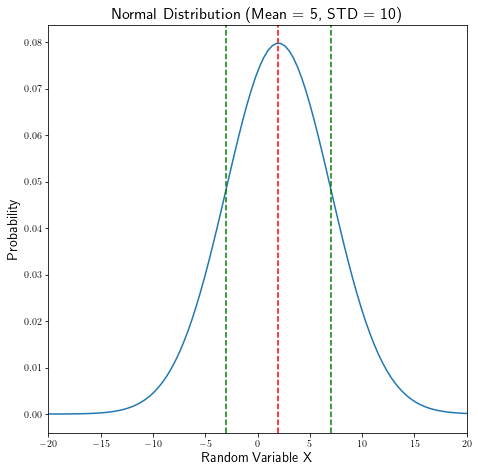

In [4]:
%reload_ext autoreload
%autoreload 2

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

plt.figure(figsize=(7.5,7.5))
plt.xlabel('Random Variable X', fontsize='14')
plt.ylabel('Probability', fontsize='14')

plt.xlim(-20, 20)
x = np.linspace(-20, 20, 100)

mean, std = 2, 5
normal_dist = stats.norm(mean, std)
plt.title('Normal Distribution (Mean = 5, STD = 10)', fontsize='16')

plt.plot(x, normal_dist.pdf(x))
plt.axvline(x=mean, color='r', linestyle='--')
plt.axvline(x=mean - std, color='g', linestyle='--')
plt.axvline(x=mean + std, color='g', linestyle='--')
plt.show()

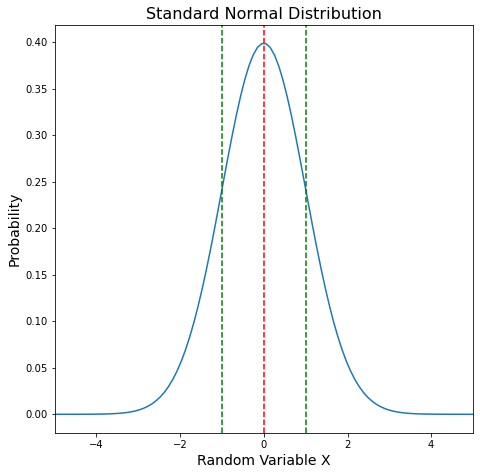

In [13]:
plt.figure(figsize=(7.5,7.5))
plt.xlabel('Random Variable X', fontsize='14')
plt.ylabel('Probability', fontsize='14')

plt.xlim(-5, 5)
x = np.linspace(-5, 5, 100)

std_normal_dist = stats.norm(0, 1)
plt.title('Standard Normal Distribution', fontsize='16')

plt.plot(x, std_normal_dist.pdf(x))
plt.axvline(x=0, color='r', linestyle='--')
plt.axvline(x=-1, color='g', linestyle='--')
plt.axvline(x=1, color='g', linestyle='--')
plt.show()

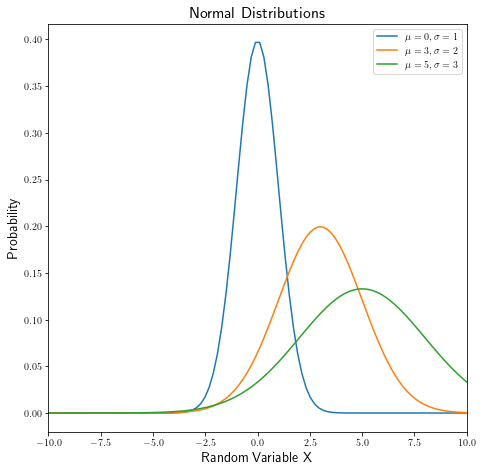

In [6]:
plt.figure(figsize=(7.5,7.5))
plt.xlabel('Random Variable X', fontsize='14')
plt.ylabel('Probability', fontsize='14')

plt.xlim(-10, 10)
x = np.linspace(-10, 10, 100)

plt.title('Normal Distributions', fontsize='16')

plt.rcParams['text.usetex'] = True
plt.plot(x, stats.norm(0, 1).pdf(x), label=r'$\mu = 0, \sigma = 1$')
plt.plot(x, stats.norm(3, 2).pdf(x), label=r'$\mu = 3, \sigma = 2$')
plt.plot(x, stats.norm(5, 3).pdf(x), label=r'$\mu = 5, \sigma = 3$')
plt.legend()
plt.show()

No handles with labels found to put in legend.


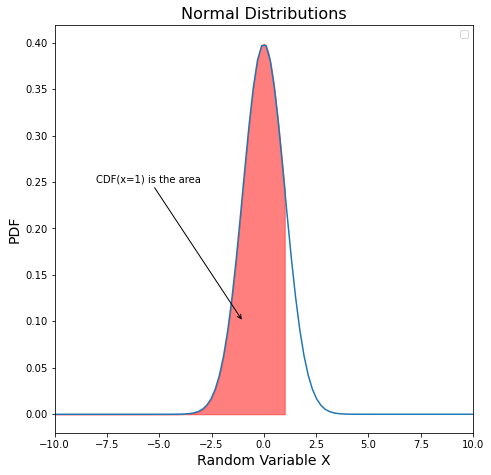

In [6]:
plt.figure(figsize=(7.5,7.5))
plt.xlabel('Random Variable X', fontsize='14')
plt.ylabel('PDF', fontsize='14')

plt.xlim(-10, 10)
x = np.linspace(-10, 10, 100)
x1 = np.linspace(-10, 1, 100)

plt.title('Normal Distributions', fontsize='16')

normal_dist = stats.norm(0, 1)
plt.plot(x, normal_dist.pdf(x))
plt.fill_between(x1, normal_dist.pdf(x1), color='r', alpha=0.5)

plt.annotate('CDF(x=1) is the area', xy=(-1, 0.1), xytext=(-8, 0.25), arrowprops=dict(arrowstyle="->"))
plt.legend()
plt.show()

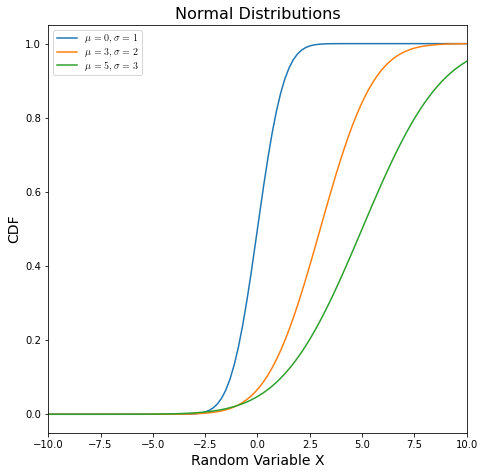

In [7]:
plt.figure(figsize=(7.5,7.5))
plt.xlabel('Random Variable X', fontsize='14')
plt.ylabel('CDF', fontsize='14')

plt.xlim(-10, 10)
x = np.linspace(-10, 10, 100)

plt.title('Normal Distributions', fontsize='16')

plt.rcParams['text.usetex'] = True
plt.plot(x, stats.norm(0, 1).cdf(x), label=r'$\mu = 0, \sigma = 1$')
plt.plot(x, stats.norm(3, 2).cdf(x), label=r'$\mu = 3, \sigma = 2$')
plt.plot(x, stats.norm(5, 3).cdf(x), label=r'$\mu = 5, \sigma = 3$')
plt.legend()
plt.show()


In [51]:
from sympy import *
x, u, a = symbols('x, u, a', real=True)
# print(a.assumptions0)
pdf = exp(-(x-u)**2 / 2 / a**2) / sqrt(2 * pi) / a
# all probabilities should sum up to 1
integrate(pdf, (x, -oo, oo))

Piecewise((1, 2*Abs(arg(a)) <= pi/2), (Integral(sqrt(2)*exp(-(-u + x)**2/(2*a**2))/(2*sqrt(pi)*a), (x, -oo, oo)), True))

In [53]:
# mean should be u
integrate(x * pdf, (x, -oo, oo))

Piecewise((u, (2*Abs(arg(a)) <= pi/2) & (2*Abs(arg(a)) < pi/2)), (Integral(sqrt(2)*x*exp(-(-u + x)**2/(2*a**2))/(2*sqrt(pi)*a), (x, -oo, oo)), True))

In [55]:
integrate(x * x * pdf, (x, -oo, oo))

Piecewise((a**2 + u**2, (2*Abs(arg(a)) <= pi/2) & (2*Abs(arg(a)) < pi/2)), (Integral(sqrt(2)*x**2*exp(-(-u + x)**2/(2*a**2))/(2*sqrt(pi)*a), (x, -oo, oo)), True))

In [56]:
integrate(x**3 * pdf, (x, -oo, oo))

Piecewise((3*a**2*u + u**3, (2*Abs(arg(a)) <= pi/2) & (2*Abs(arg(a)) < pi/2)), (Integral(sqrt(2)*x**3*exp(-(-u + x)**2/(2*a**2))/(2*sqrt(pi)*a), (x, -oo, oo)), True))

In [57]:
integrate(x**4 * pdf, (x, -oo, oo))

Piecewise((3*a**4 + 6*a**2*u**2 + u**4, (2*Abs(arg(a)) <= pi/2) & (2*Abs(arg(a)) < pi/2)), (Integral(sqrt(2)*x**4*exp(-(-u + x)**2/(2*a**2))/(2*sqrt(pi)*a), (x, -oo, oo)), True))

In [54]:
# 1st central moment should be 0
integrate((x - u) * pdf, (x, -oo, oo))

Piecewise((0, 2*Abs(arg(a)) < pi/2), (Integral(sqrt(2)*(-u + x)*exp(-(-u + x)**2/(2*a**2))/(2*sqrt(pi)*a), (x, -oo, oo)), True))

In [35]:
integrate((x-u)**2 * pdf, (x, -oo, oo))

Piecewise((a**2, 2*Abs(arg(a)) < pi/2), (Integral(sqrt(2)*(-u + x)**2*exp(-(-u + x)**2/(2*a**2))/(2*sqrt(pi)*a), (x, -oo, oo)), True))

In [34]:
integrate((x-u)**3 * pdf, (x, -oo, oo))

Piecewise((0, 2*Abs(arg(a)) < pi/2), (Integral(sqrt(2)*(-u + x)**3*exp(-(-u + x)**2/(2*a**2))/(2*sqrt(pi)*a), (x, -oo, oo)), True))

In [37]:
integrate((x-u)**4 * pdf, (x, -oo, oo))

Piecewise((3*a**4, 2*Abs(arg(a)) < pi/2), (Integral(sqrt(2)*(-u + x)**4*exp(-(-u + x)**2/(2*a**2))/(2*sqrt(pi)*a), (x, -oo, oo)), True))

In [45]:
from sympy.stats import Normal, density, cdf

x, u, a = symbols('x, u, a', real=True)
normal_dist = Normal('x', u, a)
density(normal_dist)(x)

sqrt(2)*exp(-(u - x)**2/(2*a**2))/(2*sqrt(pi)*a)

In [49]:
cdf(normal_dist)(x)

erf(sqrt(2)*(-u + x)/(2*a))/2 + 1/2

In [58]:
from sympy.stats import moment, P, E, variance
moment(normal_dist, 1)

u

In [59]:
moment(normal_dist, 2)

a**2 + u**2

In [60]:
moment(normal_dist, 3)

3*a**2*u + u**3

In [65]:
moment(normal_dist, 4)

3*a**4 + 6*a**2*u**2 + u**4

In [67]:
E(normal_dist)

u

In [64]:
variance(normal_dist)

a**2

In [66]:
X = Normal('snd', 0, 1)
P(X <= 0.8)


0.788144601416603